ANALYTICS IN RETAIL:
With the retail market getting more and more competitive by the day, there has never been
anything more important than the ability for optimizing service business processes when
trying to satisfy the expectations of customers. Channelizing and managing data with the
aim of working in favor of the customer as well as generating profits is very significant for
survival.
Ideally, a retailer’s customer data reflects the company’s success in reaching and nurturing
its customers. Retailers built reports summarizing customer behavior using metrics such as
conversion rate, average order value, recency of purchase and total amount spent in recent
transactions. These measurements provided general insight into the behavioral tendencies
of customers.
Customer intelligence is the practice of determining and delivering data-driven insights into
past and predicted future customer behavior.To be effective, customer intelligence must
combine raw transactional and behavioral data to generate derived measures.
In a nutshell, for big retail players all over the world, data analytics is applied more these
days at all stages of the retail process – taking track of popular products that are emerging,
doing forecasts of sales and future demand via predictive simulation, optimizing placements
of products and offers through heat-mapping of customers and many others.
DATA AVAILABILITY:
 Retail Data.xlsx
o This book has three sheets (Customer, Transaction, Product Heirarchy)
o Customer: Customers information including demographics
o Transaction: Transactions of customers
o Product Heirarchy: Product information (cateogry, sub category etc...)
BUSINESS PROBLEM:
A Retail store is required to analyze the day-to-day transactions and keep a track of its customers
spread across various locations along with their purchases/returns across various categories.
Create a report and display the below calculated metrics, reports and inferences.
1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.
2. Prepare a summary report for the merged data set.
a. Get the column names and their corresponding data types
b. Top/Bottom 10 observations

c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
d. Frequency tables for all the categorical variables
3. Generate histograms for all continuous variables and frequency bars for categorical variables.
4. Calculate the following information using the merged dataset :
a. Time period of the available transaction data
b. Count of transactions where the total amount of transaction was negative
5. Analyze which product categories are more popular among females vs male customers.
6. Which City code has the maximum customers and what was the percentage of customers from
that city?
7. Which store type sells the maximum products

In [408]:
import pandas as pd
import numpy as np

In [409]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B6D2-E8E2

 Directory of C:\Users\jitain.sangwan_vvdnt\case study

12-Jul-22  12:31 AM    <DIR>          .
12-Jul-22  12:31 AM    <DIR>          ..
11-Jul-22  11:53 AM    <DIR>          .ipynb_checkpoints
02-Nov-15  06:38 AM           130,469 Customer.csv
27-May-18  04:05 PM               588 prod_cat_info.csv
11-Jul-22  11:50 AM           547,395 Python Foundation Case Study 1 - Retail Case Study.rar
14-Jan-19  07:38 PM           100,037 Retail Case Study.pdf
30-May-18  05:37 PM         1,483,731 Transactions.csv
12-Jul-22  12:31 AM           405,349 Untitled.ipynb
               6 File(s)      2,667,569 bytes
               3 Dir(s)  116,810,833,920 bytes free


In [410]:
cust,prod_info,transaction = pd.read_csv("Customer.csv"),pd.read_csv("prod_cat_info.csv"),pd.read_csv("Transactions.csv")

In [411]:
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)
prod_concat = pd.merge(left=transaction, right=prod_info,on=["prod_subcat_code","prod_cat_code"],how="left")
prod_concat

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [412]:
cust.rename(columns={"customer_Id":"cust_id"},inplace=True)
cust

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [413]:

prod_concat = pd.merge(left = cust , right = prod_concat,on=["cust_id"],how="left")

In [414]:
prod_concat.dtypes

cust_id               int64
DOB                  object
Gender               object
city_code           float64
transaction_id      float64
tran_date            object
prod_subcat_code    float64
prod_cat_code       float64
Qty                 float64
Rate                float64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [415]:
prod_concat.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,1.619787e+10,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,2.881014e+10,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,6.463344e+10,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids


In [416]:
prod_concat.describe()

,cust_id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23194.000000,23186.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271022.609296,5.480204,5.007348e+10,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2431.350129,2.863884,2.898194e+10,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268936.000000,3.000000,2.493864e+10,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,270981.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,273115.750000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [417]:
prod_concat.loc[:,["Store_type","prod_cat","prod_subcat","Gender"]].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23053,23053,23053,23185
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9311,6069,3048,11877


In [418]:
import matplotlib.pyplot as plt

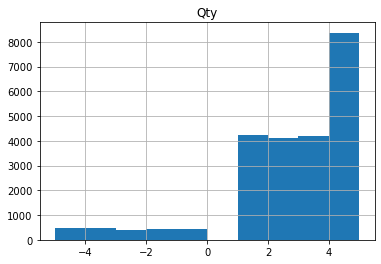

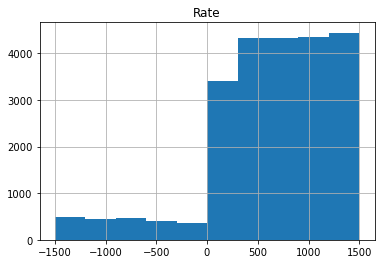

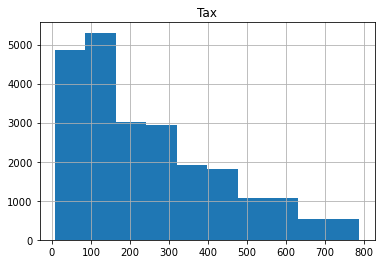

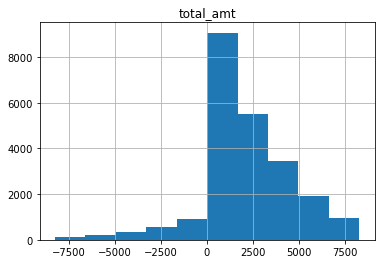

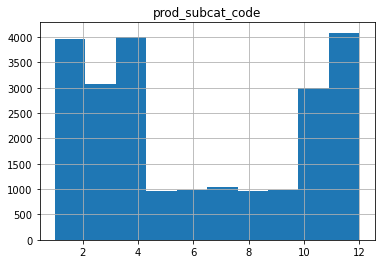

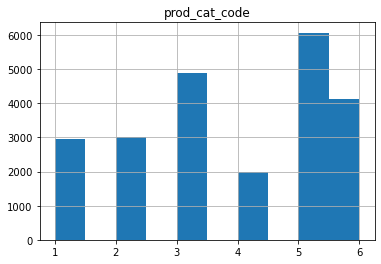

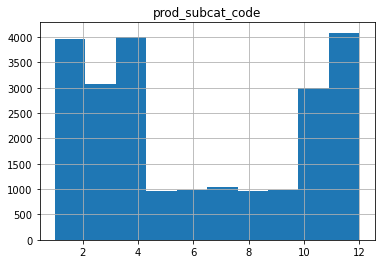

In [419]:
col  = prod_concat[["Qty","Rate","Tax","total_amt","prod_subcat_code","prod_cat_code","prod_subcat_code"]].columns
for i in col:
    prod_concat[i].hist()
    plt.title(i)
    plt.show()


<AxesSubplot:xlabel='Store_type', ylabel='count'>

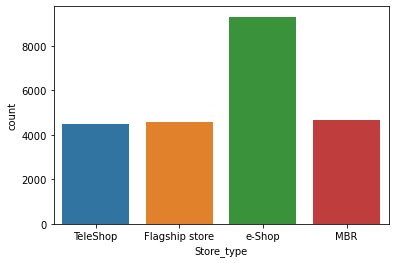

In [420]:
import seaborn as sns
# for i in ["Store_type","prod_cat","prod_subcat","Gender"]:
sns.countplot(x=prod_concat["Store_type"])

<AxesSubplot:xlabel='prod_cat', ylabel='count'>

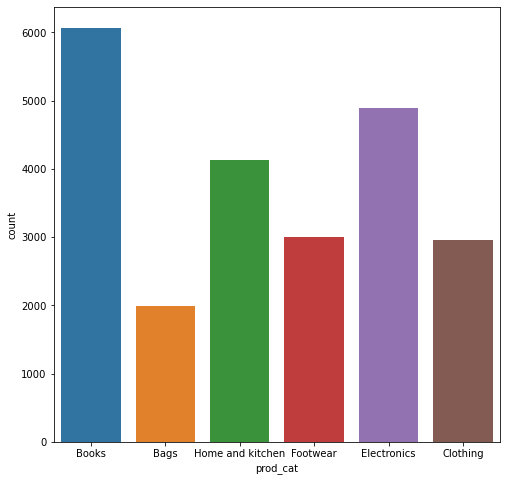

In [421]:
plt.figure(figsize=(8,8))
sns.countplot(x=prod_concat["prod_cat"])

<AxesSubplot:xlabel='prod_subcat', ylabel='count'>

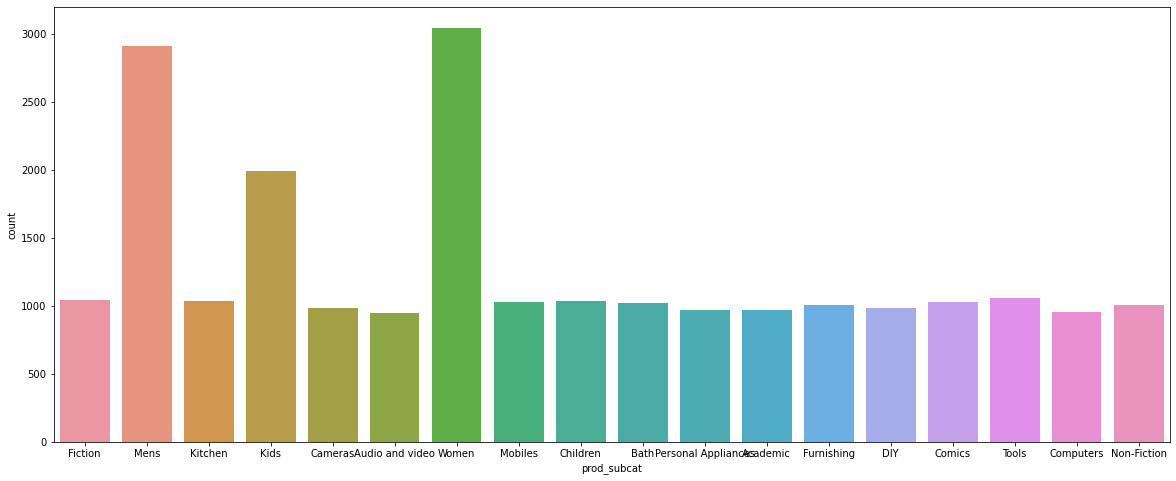

In [422]:
plt.figure(figsize=(20,8))
sns.countplot(x = prod_concat["prod_subcat"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

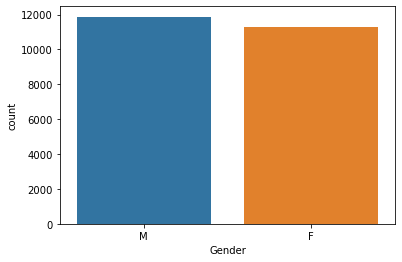

In [423]:
sns.countplot(x = prod_concat["Gender"])

In [456]:
prod_concat.tran_date = pd.to_datetime(prod_concat.tran_date)
print("Transaction are from :",prod_concat.tran_date.min(),"to ",prod_concat.tran_date.max())

Transaction are from : 2011-01-02 00:00:00  to  2014-12-02 00:00:00


In [425]:
# prod_concat.drop_na()
female = prod_concat.dropna().groupby(["Gender","prod_cat"])

In [426]:
female =female["Qty"].sum().reset_index()

In [427]:
female = female.pivot(index="Gender",columns="prod_cat",values="Qty")
col = prod_concat.prod_cat.dropna().unique()

['Books', 'Bags', 'Home and kitchen', 'Footwear', 'Electronics', 'Clothing']
Books


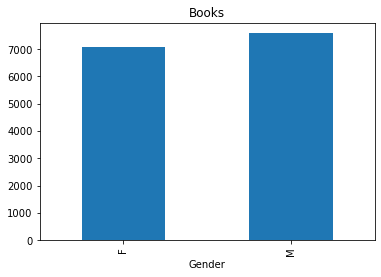

Bags


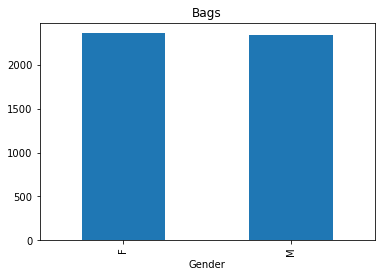

Home and kitchen


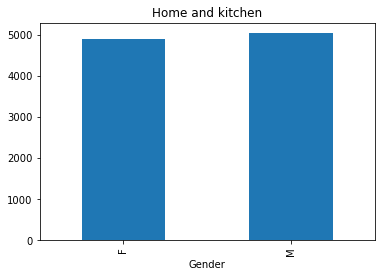

Footwear


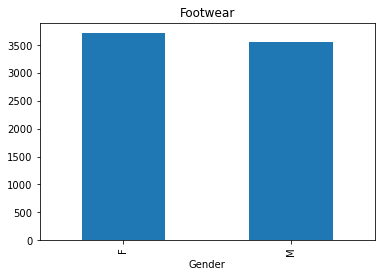

Electronics


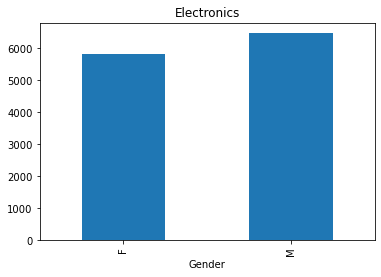

Clothing


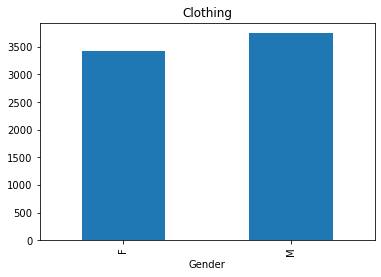

In [428]:
print(list(col))
for i in col:
    print(i)
    female[i].plot(kind ="bar")
    plt.title(i)
    plt.show()

In [429]:
# prod_concat[["Qty","Rate","Tax","total_amt"]]= prod_concat[["Qty","Rate","Tax","total_amt"]].abs()
prod_concat.groupby("Store_type")[["Qty","total_amt"]].sum().sort_values(by=["Qty","total_amt"],ascending=False)
#E-Shop sells most by Quantity and total amount 

,Qty,total_amt
Store_type,,
e-Shop,22763.0,1.982482e+07
MBR,11194.0,9.674486e+06
Flagship store,11133.0,9.715688e+06
TeleShop,10984.0,9.364781e+06


In [430]:
new = prod_concat.groupby(["Store_type","prod_cat"])[["total_amt"]].sum()
new.loc["Flagship store"].loc[["Electronics","Clothing"]]
# [new["Store_type"]=="Flagship store" and new["prod_cat"] == ("Electronics" or "Clothing" )]

,total_amt
prod_cat,
Electronics,2215136.04
Clothing,1194423.23


In [431]:
male  = prod_concat.groupby(["Gender","prod_cat"])[["total_amt"]].sum()
male.loc["M"].loc["Electronics"]

total_amt    5703109.425
Name: Electronics, dtype: float64

In [432]:
customer  =  prod_concat[prod_concat.total_amt>0].drop_duplicates(subset=['transaction_id']).groupby(["cust_id"])["transaction_id"].count()
customer[customer>10]

cust_id
266794    11
270535    11
270803    11
272741    11
273014    11
274227    11
Name: transaction_id, dtype: int64

In [436]:
prod_concat["DOB"] =pd.to_datetime(prod_concat["DOB"])
prod_concat["Age"]  =  2022 - prod_concat["DOB"].dt.year 

In [443]:
# spend  = prod_concat.groupby(["Age","prod_cat"])["total_amt"].sum()
prod_concat['Age'] = pd.cut(prod_concat['Age'],bins=[24,35,46,57],labels=['25-35','36-45','46-55'],include_lowest=True)

In [444]:
young  = prod_concat.groupby(["Age","prod_cat"])[["total_amt"]].sum()


In [454]:
young.loc['25-35'].loc[["Electronics","Books"]]

,total_amt
prod_cat,
Electronics,2883920.715
Books,3174082.665


In [460]:
prod_concat[(prod_concat.tran_date>'2014-01-01') & (prod_concat.tran_date<'2014-03-01') & (prod_concat.Age == "25-35")]["total_amt"].sum()

388173.24